# Review
Hi, my name is Dmitry and I will be reviewing your project.

You can find my comments in colored markdown cells:

<div class="alert alert-success">
    If everything is done succesfully.
</div>

<div class="alert alert-warning">
    If I have some (optional) suggestions, or questions to think about, or general comments.
</div>

<div class="alert alert-danger">
    If a section requires some corrections. Work can't be accepted with red comments.
</div>

Please don't remove my comments, as it will make further review iterations much harder for me.

Feel free to reply to my comments or ask questions using the following template:

<div class="alert alert-info">
    For your comments and questions.
</div>

First of all, thank you for turning in the project! There are some problems that need to be fixed before the project can be accepted. But don't worry, you've got this!

<div class="alert alert-success">
    <b>V4.</b>
    Hi! Thanks for taking the time to improve the project! Now it's accepted. Good luck on the next sprint!
</div>

The Sure Tomorrow insurance company wants to protect its clients' data. Your task is to develop a data transforming algorithm that would make it hard to recover personal information from the transformed data. Prove that the algorithm works correctly

The data should be protected in such a way that the quality of machine learning models doesn't suffer. You don't need to pick the best model.

## PROBLEMS
## Why am getting a different R2 score when there is a transformation? That makes it all wrong. 

<div class="alert alert-warning">
    I added some pointers that I hope will help you work this out!
</div>

## 1. Data downloading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
%matplotlib inline
data= pd.read_csv('/datasets/insurance_us.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
Gender                5000 non-null int64
Age                   5000 non-null float64
Salary                5000 non-null float64
Family members        5000 non-null int64
Insurance benefits    5000 non-null int64
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [2]:
data.head()

,Gender,Age,Salary,Family members,Insurance benefits
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [3]:
data.isna().sum()

Gender                0
Age                   0
Salary                0
Family members        0
Insurance benefits    0
dtype: int64

In [4]:
data.corr()["Insurance benefits"].abs().sort_values(ascending=False)

Insurance benefits    1.000000
Age                   0.651030
Family members        0.036290
Salary                0.014963
Gender                0.010140
Name: Insurance benefits, dtype: float64

We ordered feature variables with respect to their absolute correlation coefficient with the target variable Insurance Benefits. The idea is to show that as correlation decreases, linear relationships worsen.

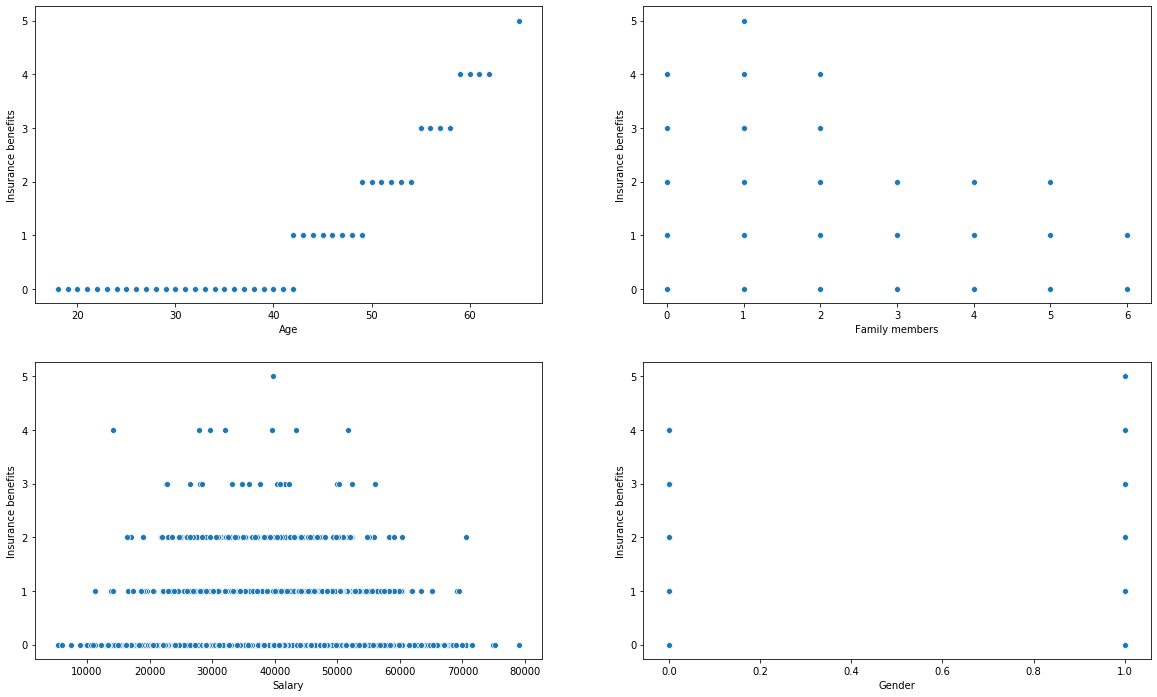

In [5]:
ordered_columns_corr = data.corr()["Insurance benefits"].abs().sort_values(ascending=False).index
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(20, 12))
axs = axs.flatten()

index = 0
for colname in ordered_columns_corr:
    if colname != "Insurance benefits":
        sns.scatterplot(ax=axs[index], x=colname, y="Insurance benefits", data=data)
        index += 1

Taking a look at the graphs, we notice about of the positive correlation between ages and insurance benefits and it seems that got a strengh relation. The rest of features are not meaningfull and there are no good relation with the target variable

## 2. Multiplication of matrices

Denote:

- $X$ — feature matrix (zero column consists of unities)

- $y$ — target vector

- $P$ — matrix by which the features are multiplied

- $w$ — linear regression weight vector (zero element is equal to the shift)

This equation is the regression equation. 𝛽₀, 𝛽₁, …, 𝛽ᵣ are the regression coefficients, and 𝜀 is the random error.Our regression is composed by 4 variables that made 5 parameters in total and our target variable is insurance benefits
$$
y = f(x)
$$

$$
y = 	\beta_{0} + (\beta_{1} X_{1}) + (\beta_{2} X_{2}) + (\beta_{3} X_{3}) + (\beta_{3} X_{4})
$$

Linear regression calculates the estimators of the regression coefficients or simply the predicted weights, denoted with 𝑏₀, 𝑏₁, …, 𝑏ᵣ.Where X is the input data and each column is a data feature, b is a vector of coefficients and y is a vector of output variables for each row in X. Here we got 4 columns (features) and many rows as observations are

$$
\begin{equation*}
X_{m,n} = 
\begin{pmatrix}
x_{1,1} & x_{1,2}   & x_{1,3} & x_{1,4} \\
x_{2,1} & x_{2,2}   & x_{2,3} & x_{1,4}\\
\vdots  & \vdots    & \vdots  & \vdots \\
x_{m,1} & x_{m,2}   & x_{m,3}  & x_{m,4}
\end{pmatrix}
\end{equation*}
$$

Weight
\begin{equation}
w_{1,n}
   \begin{pmatrix} 
   w_{11} \\
   w_{12} \\
   w_{13} \\
   w_{14} \\
   \end{pmatrix} 
\end{equation}
Target
\begin{equation}
y_{1,n}
   \begin{pmatrix} 
   y_{11} \\
   y_{12} \\
   y_{13} \\
   y_{14} \\
   \end{pmatrix} 
\end{equation}


Basing ourselves in basic equiations and rules of Linear algebra with matrix $$ AE= EA= A$$$$ AA^{-1} = A^{-1}A $$ $$ (AB)^{-1}= A^{-1}B^{-1}$$

Concerning to our linear regression expression $$ a= Xw$$ $$ w= (X^{T}X)^{-1}X^{T}y$$

<div class="alert alert-danger">
    <s>The last equation can only hold if $X$ is the identity matrix. Suppose we multiply the feature matrix $X$ by an invertible matrix $P$. That is, $$X' = XP.$$
    We would like to find out how the new weights $w'$ are related to the old weights $w$. To do that, you need to substitute the expression for $X'$ into the training formula and simplify it using matrix multiplication rules. Remember that:
    <ol><li>Matrix multiplication is not commutative: $AB \neq BA$ in general, so you can't freely rearrange the multiplication terms.
        <li>$(AB)^T = B^T A^T$
        <li>$(AB)^{-1} = B^{-1} A^{-1}$
</div>

## 3. Transformation algorithm

We got matrix $X$ multiply by an invertible matrix $P$.What we want to obtain is the new weights $w'$

$$X'= XP $$ $$w'= (XP^{T}XP)^{-1}XP^{T}y$$ 
$$w'=(X^{T}P^{T}XP)^{-1}X^{T}P^{T}y$$
$$w'=(X^{T}XP)^{-1}X^{T}P^{T-1}Py$$
$$w'=(X^{T}XP)^{-1}X^{T}P^{-1}y$$
$$w'=(X^{T}X)^{-1}X^{T}P^{-1}y$$
$$w'=P^{-1}w$$ 

We need to refer it to our case $X'$ and $w'$ and reflect it on our formulas and expressions. $$a'= X'w = XPw'= a$$ 

As a final result, we want to be sure that the quality of the model would be the same. Our target is minimize the MSE score and both paths are good to get it 

<div class="alert alert-danger">
    <s>You are supposed to describe and justify the algorithm for feature obfuscation, not the algorithm for finding the weights of a linear regression.
</div>

<div class="alert alert-success">
    <b>V2.</b>
    The proof is correct!
</div>

## 4. Algorithm test

In [6]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

First, we split the data in train and test parts

In [7]:
features = data.drop('Insurance benefits', axis=1)
target = data['Insurance benefits']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=12345)

Original Features

In [9]:
model = LinearRegression()
model.fit(x_train, y_train)
predictions = model.predict(x_test)
print(r2_score(y_test, predictions))

0.4117683956770434


features obfuscation

We need guarantees if our marix P is invertible

In [81]:
P= np.random.normal(0,1,size=(x_train.shape[1], x_train.shape[1]))
try:
    inv_P=np.linalg.inv(P)

except  np.linalg.LinAlgError:
    print('the matrix P is not invertible')

Adapt our features to our matrix P which has a dimension 4X4

In [90]:
x_train_inv= x_train.dot(P)
x_test_inv= x_test.dot(P)

In [91]:
model = LinearRegression()
model.fit(x_train_inv, y_train)
predictions = model.predict(x_test_inv)
print(r2_score(y_test, predictions))

0.41176839567707124


Finally get in both same qualit results, as we demostrate through the algorithms. so our results must be no be affected by these changes on the features 

<div class="alert alert-danger">
    <s>You are supposed to test the algorithm for feature obfuscation: first train a linear regression on original features and evaluate it, then obfuscate the features and train a linear regression on obfuscated features. Then compare the scores. Remember that you need a test set to evaluate a model.
</div>

<div class="alert alert-danger">
    <s><b>V2.</b>
    Looks like there's an error in your linear regression class. You don't have to write a class for linear regression, just use the one from scikit-learn. As you proved above, the predictions will be the same for a model trained on original features and the model trained on features multiplied by an invertible matrix. Don't forget to split the data into train and test!
</div>

<div class="alert alert-danger">
    <s><b>V3.</b>
    <ol><li>The $R^2$ are different, because there are some unneeeded multiplications. A matrix $X$ of a shape $m \times n$ can be multiplied by a matrix $P$ of shape $n \times p$, the dimensions of the product $XP$ are then $m \times p$. We'd like the $XP$ to have the same shape as $X$, so $P$ has to be of shape $n \times n$. You don't need to multiply the feature matrix by transpose or anything, that is done by the linear regression under the hood. The only thing you need to do is multiply $X$ by $P$.
    <li>You need to use x_train multiplied by P for training, and then make predictions on x_test multiplied by P and calculate the r2_score of predictions and y_test.
</div>

<div class="alert alert-success">
    <b>V4.</b>
    Great, now the expriment is correct
</div>

## Checklist

Type 'x' to check. Then press Shift+Enter.

- [x]  Jupyter Notebook is open
- [ ]  Code is error free
- [ ]  The cells with the code have been arranged in order of execution
- [ ]  Step 1 performed: the data was downloaded
- [ ]  Step 2 performed: the answer to the matrix multiplication problem was provided
    - [ ]  The correct answer was chosen
    - [ ]  The choice was justified
- [ ]  Step 3 performed: the transform algorithm was proposed
    - [ ]  The algorithm was described
    - [ ]  The algorithm was justified
- [ ]  Step 4 performed: the algorithm was tested
    - [ ]  The algorithm was realized
    - [ ]  Model quality was assessed before and after the transformation